In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
#add ridge lasso polynomial regression and pcr
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

In [268]:
data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')
#make it so in pets_allowed column None NaN and np.nan are 0 
data['pets_allowed'] = data['pets_allowed'].replace(['None', 'NaN',None,np.NaN," "], 0)

#show only the pets_allowed column
print(data['pets_allowed'])

0             Cats
1        Cats,Dogs
2                0
3        Cats,Dogs
4        Cats,Dogs
           ...    
99487            0
99488    Cats,Dogs
99489    Cats,Dogs
99490    Cats,Dogs
99491            0
Name: pets_allowed, Length: 99492, dtype: object


C:\Users\baran\AppData\Local\Temp\ipykernel_8792\1822934057.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')


In [269]:
#if amenities is missing, replace with 0
data['amenities'] = data['amenities'].fillna(0)

#delete rows with missing 
data = data.dropna()
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",0,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",0,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,0,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",0,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",0,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83491,5124208692,housing/rent/apartment,Cozy Studio,Brooklyn This beautiful STUDIO apartment locat...,"Cable or Satellite,Internet Access,Wood Floors",1.0,3.0,USD,No,No,...,"$1,200",Monthly,900,5433 Avenue I,Brooklyn,NY,40.6496,-73.9596,RentDigs.com,1544433414
83492,5141748370,housing/rent/apartment,3901 Edgar Park Ave 29,"2bed1bath with ""REFRIGERATED AIR"" we pay for W...","Dishwasher,Garbage Disposal,Pool,Refrigerator",1.0,2.0,USD,No,Thumbnail,...,$750,Monthly,1100,3901 Edgar Park Avenue 29,El Paso,TX,31.8547,-106.4384,GoSection8,1545949792
83493,5123147226,housing/rent/apartment,New Upgraded Two BR For Rent In San Antonio,San Antonio This San Antonio 1 level offers a ...,"Fireplace,Parking,Pool,Tennis",2.0,2.0,USD,No,Thumbnail,...,"$1,200",Monthly,1215,2940 Wood Circle San Antonio TX 78251,San Antonio,TX,29.4622,-98.6704,RentDigs.com,1544346864
83495,5122636900,housing/rent/apartment,Large One BR GROUND FLOOR APARTMENT FOR RENT,"Portage Great area, close to beaches, marinas,...","AC,Cable or Satellite,Internet Access",1.0,1.0,USD,No,No,...,$675,Monthly,675,1848 Truman St,Portage,IN,41.5846,-87.1747,RentDigs.com,1544293740


In [270]:
#remove all rows where price_type is not Monthly
data = data[data['price_type'] == 'Monthly']
data


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",0,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",0,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,0,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",0,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",0,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83491,5124208692,housing/rent/apartment,Cozy Studio,Brooklyn This beautiful STUDIO apartment locat...,"Cable or Satellite,Internet Access,Wood Floors",1.0,3.0,USD,No,No,...,"$1,200",Monthly,900,5433 Avenue I,Brooklyn,NY,40.6496,-73.9596,RentDigs.com,1544433414
83492,5141748370,housing/rent/apartment,3901 Edgar Park Ave 29,"2bed1bath with ""REFRIGERATED AIR"" we pay for W...","Dishwasher,Garbage Disposal,Pool,Refrigerator",1.0,2.0,USD,No,Thumbnail,...,$750,Monthly,1100,3901 Edgar Park Avenue 29,El Paso,TX,31.8547,-106.4384,GoSection8,1545949792
83493,5123147226,housing/rent/apartment,New Upgraded Two BR For Rent In San Antonio,San Antonio This San Antonio 1 level offers a ...,"Fireplace,Parking,Pool,Tennis",2.0,2.0,USD,No,Thumbnail,...,"$1,200",Monthly,1215,2940 Wood Circle San Antonio TX 78251,San Antonio,TX,29.4622,-98.6704,RentDigs.com,1544346864
83495,5122636900,housing/rent/apartment,Large One BR GROUND FLOOR APARTMENT FOR RENT,"Portage Great area, close to beaches, marinas,...","AC,Cable or Satellite,Internet Access",1.0,1.0,USD,No,No,...,$675,Monthly,675,1848 Truman St,Portage,IN,41.5846,-87.1747,RentDigs.com,1544293740


In [271]:
#delete the columns "title, body, currency, id, has_photo, price_display, address ,cityname, source, time,category,price_type"
data = data.drop(['title', 'body', 'currency', 'id', 'has_photo', 'price_display', 'address', 'cityname', 'source', 'time', 'category', 'price_type'], axis=1)
data


,amenities,bathrooms,bedrooms,fee,pets_allowed,price,square_feet,state,latitude,longitude
0,0,1.0,1.0,No,Cats,2195.0,542,CA,33.8520,-118.3759
1,0,1.5,3.0,No,"Cats,Dogs",1250.0,1500,VA,37.0867,-76.4941
2,0,2.0,3.0,No,0,1395.0,1650,NC,35.8230,-78.6438
3,0,1.0,2.0,No,"Cats,Dogs",1600.0,820,CA,38.3622,-121.9712
4,0,1.0,1.0,No,"Cats,Dogs",975.0,624,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...
83491,"Cable or Satellite,Internet Access,Wood Floors",1.0,3.0,No,0,1200.0,900,NY,40.6496,-73.9596
83492,"Dishwasher,Garbage Disposal,Pool,Refrigerator",1.0,2.0,No,0,750.0,1100,TX,31.8547,-106.4384
83493,"Fireplace,Parking,Pool,Tennis",2.0,2.0,No,"Cats,Dogs",1200.0,1215,TX,29.4622,-98.6704
83495,"AC,Cable or Satellite,Internet Access",1.0,1.0,No,0,675.0,675,IN,41.5846,-87.1747


In [272]:

if 'pets_allowed' in data.columns: 
	data['pets_allowed'] = data['pets_allowed'].replace('Cats', '1')
	data['pets_allowed'] = data['pets_allowed'].replace('Dogs', '1')
	data['pets_allowed'] = data['pets_allowed'].replace('Cats,Dogs', '1')
	data['pets_allowed'] = data['pets_allowed'].replace('Dogs,Cats', '1')
 
data



,amenities,bathrooms,bedrooms,fee,pets_allowed,price,square_feet,state,latitude,longitude
0,0,1.0,1.0,No,1,2195.0,542,CA,33.8520,-118.3759
1,0,1.5,3.0,No,1,1250.0,1500,VA,37.0867,-76.4941
2,0,2.0,3.0,No,0,1395.0,1650,NC,35.8230,-78.6438
3,0,1.0,2.0,No,1,1600.0,820,CA,38.3622,-121.9712
4,0,1.0,1.0,No,1,975.0,624,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...
83491,"Cable or Satellite,Internet Access,Wood Floors",1.0,3.0,No,0,1200.0,900,NY,40.6496,-73.9596
83492,"Dishwasher,Garbage Disposal,Pool,Refrigerator",1.0,2.0,No,0,750.0,1100,TX,31.8547,-106.4384
83493,"Fireplace,Parking,Pool,Tennis",2.0,2.0,No,1,1200.0,1215,TX,29.4622,-98.6704
83495,"AC,Cable or Satellite,Internet Access",1.0,1.0,No,0,675.0,675,IN,41.5846,-87.1747


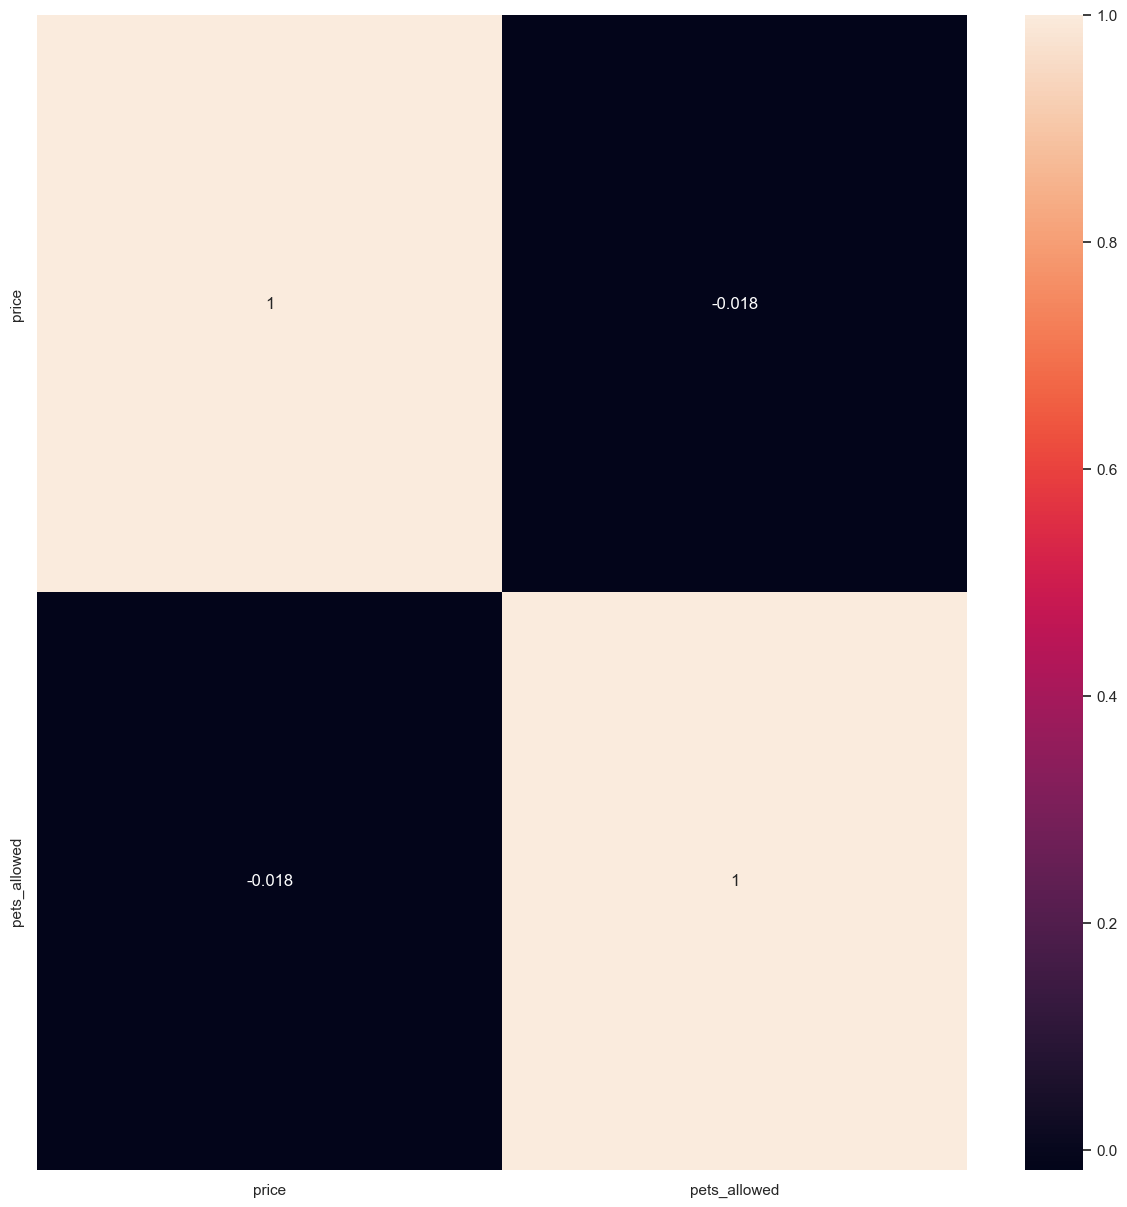

In [273]:
corr = data[['price', 'pets_allowed',]].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [274]:
#make one hot encoding for the amenities column
amenities = data['amenities'].str.get_dummies(sep=',')
data = pd.concat([data, amenities], axis=1)
data = data.drop(columns=['amenities'])
data

,bathrooms,bedrooms,fee,pets_allowed,price,square_feet,state,latitude,longitude,0,...,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors
0,1.0,1.0,No,1,2195.0,542,CA,33.8520,-118.3759,1,...,0,0,0,0,0,0,0,0,0,0
1,1.5,3.0,No,1,1250.0,1500,VA,37.0867,-76.4941,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,No,0,1395.0,1650,NC,35.8230,-78.6438,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,No,1,1600.0,820,CA,38.3622,-121.9712,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,No,1,975.0,624,NM,35.1038,-106.6110,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83491,1.0,3.0,No,0,1200.0,900,NY,40.6496,-73.9596,0,...,0,0,0,0,0,0,0,0,0,1
83492,1.0,2.0,No,0,750.0,1100,TX,31.8547,-106.4384,0,...,0,0,1,1,0,0,0,0,0,0
83493,2.0,2.0,No,1,1200.0,1215,TX,29.4622,-98.6704,0,...,0,0,1,0,0,0,1,0,0,0
83495,1.0,1.0,No,0,675.0,675,IN,41.5846,-87.1747,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

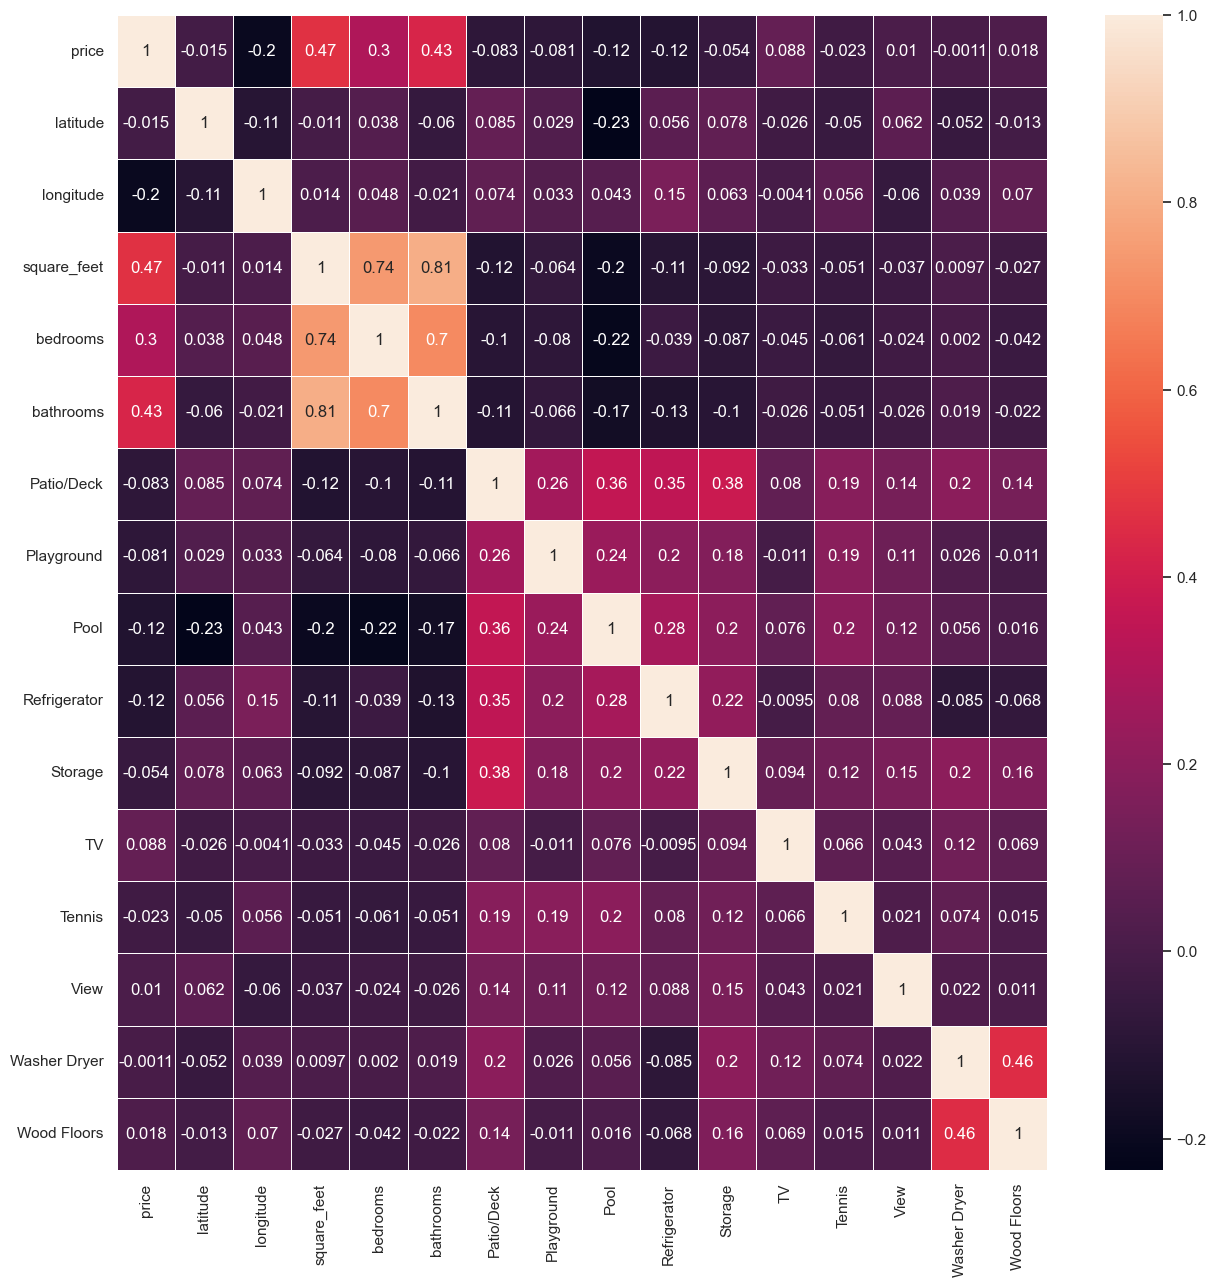

In [275]:
corr = data[['price', 'latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer', 'Wood Floors']].corr()
corr
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
#heatmap with small text
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)

<Axes: >

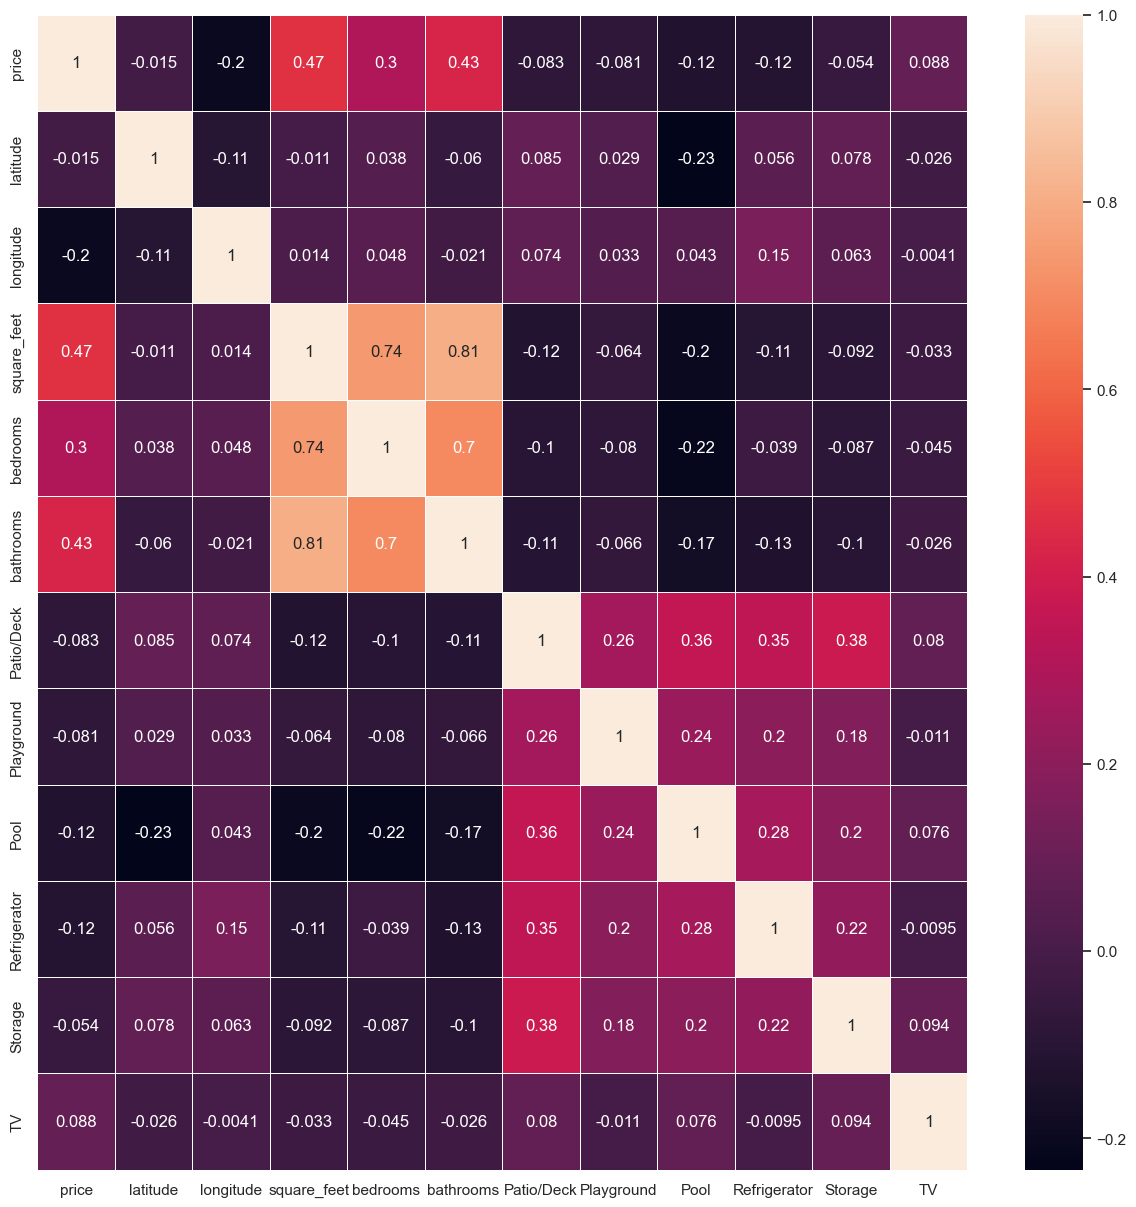

In [276]:
corr = data[['price', 'latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV']].corr()
corr
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
#heatmap with small text
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)

Mean Squared Error: 583813.653252486
R2 score: 0.27834090240198106


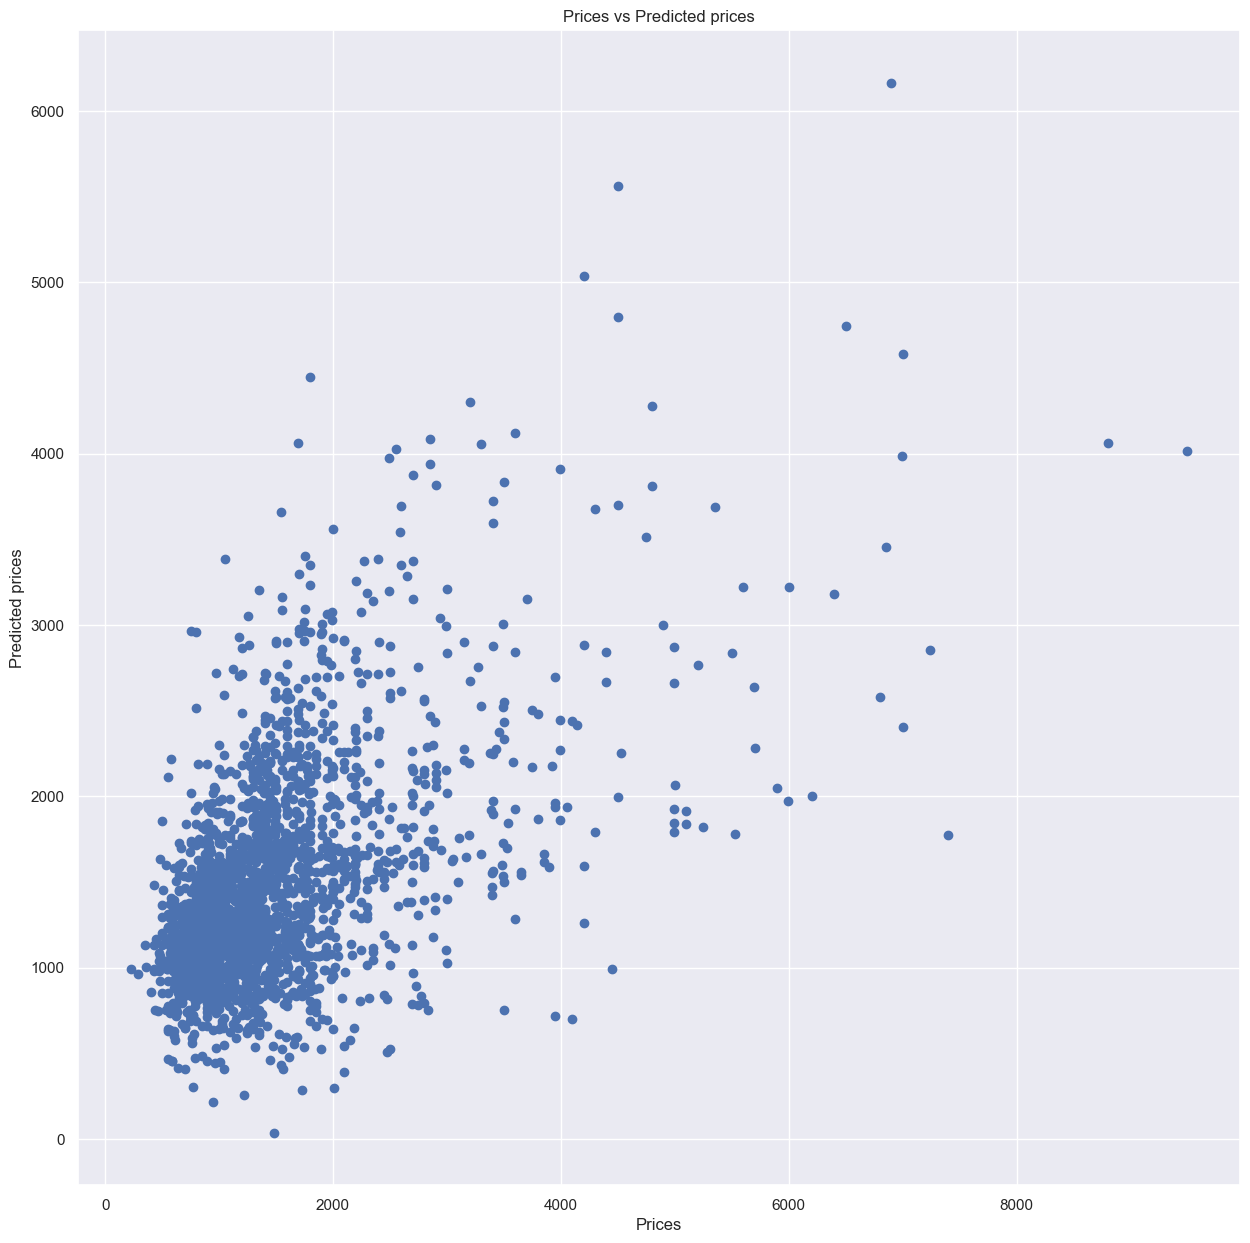

In [277]:
#run linear regression to predict price with 'price', 'latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV'
X = data[['latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
#show in a plot
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


<Axes: xlabel='state', ylabel='price'>

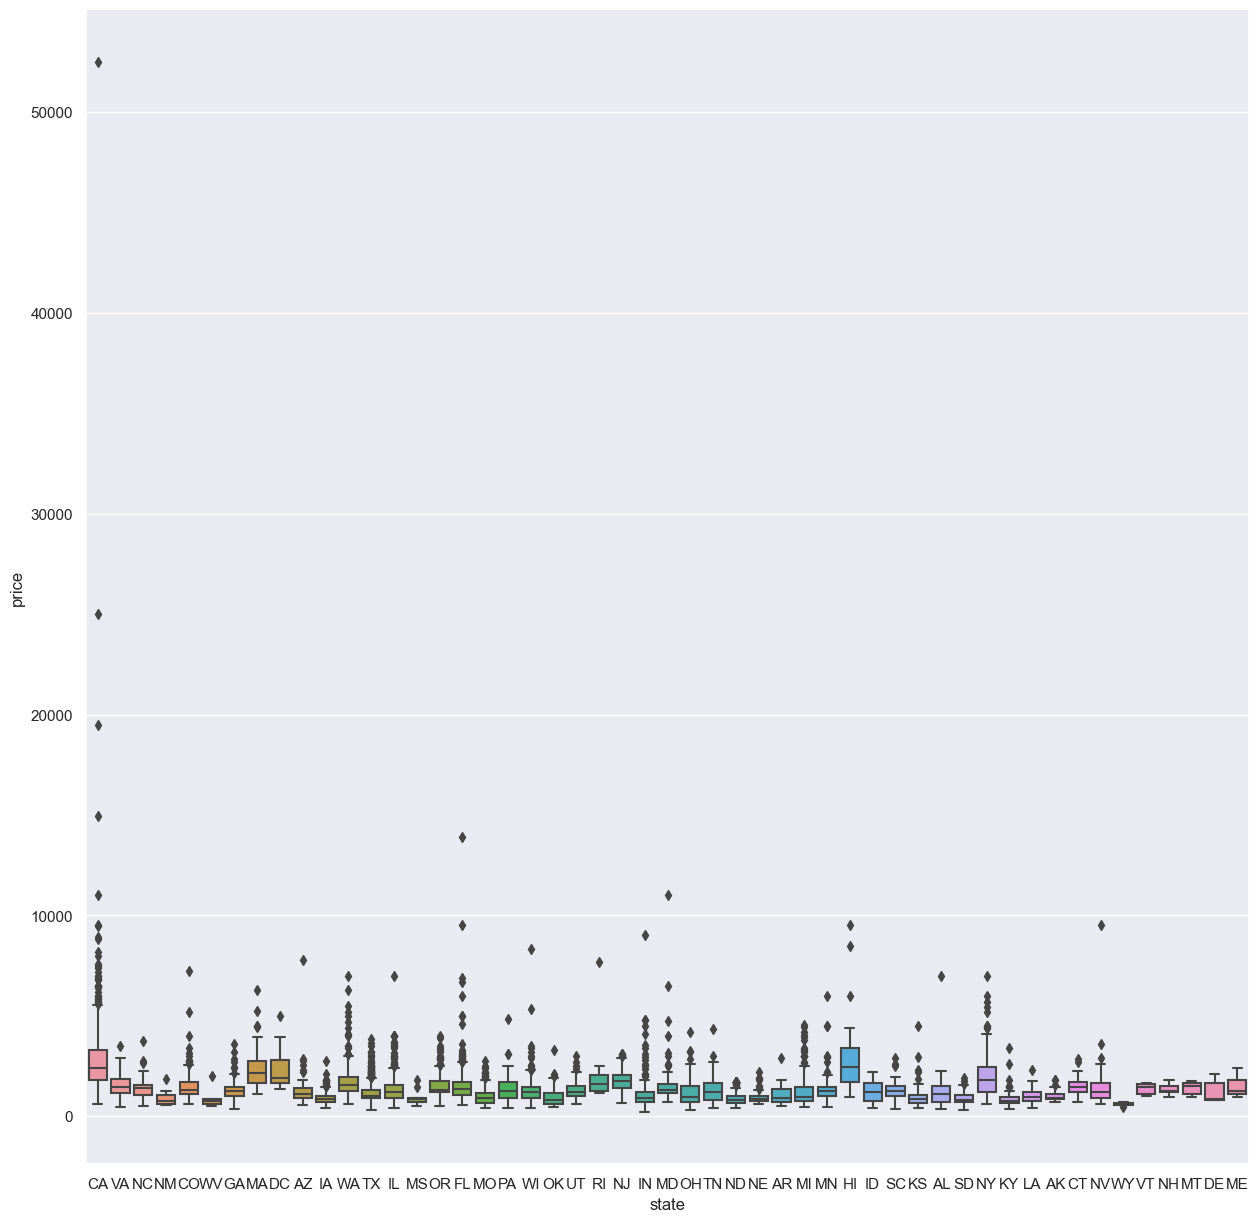

In [278]:
sns.set_theme(rc={'figure.figsize':(15,15)})
sns.boxplot(x='state', y='price', data=data)

Mean Squared Error: 253287.3848274669
R2 score: 0.6869084089602463


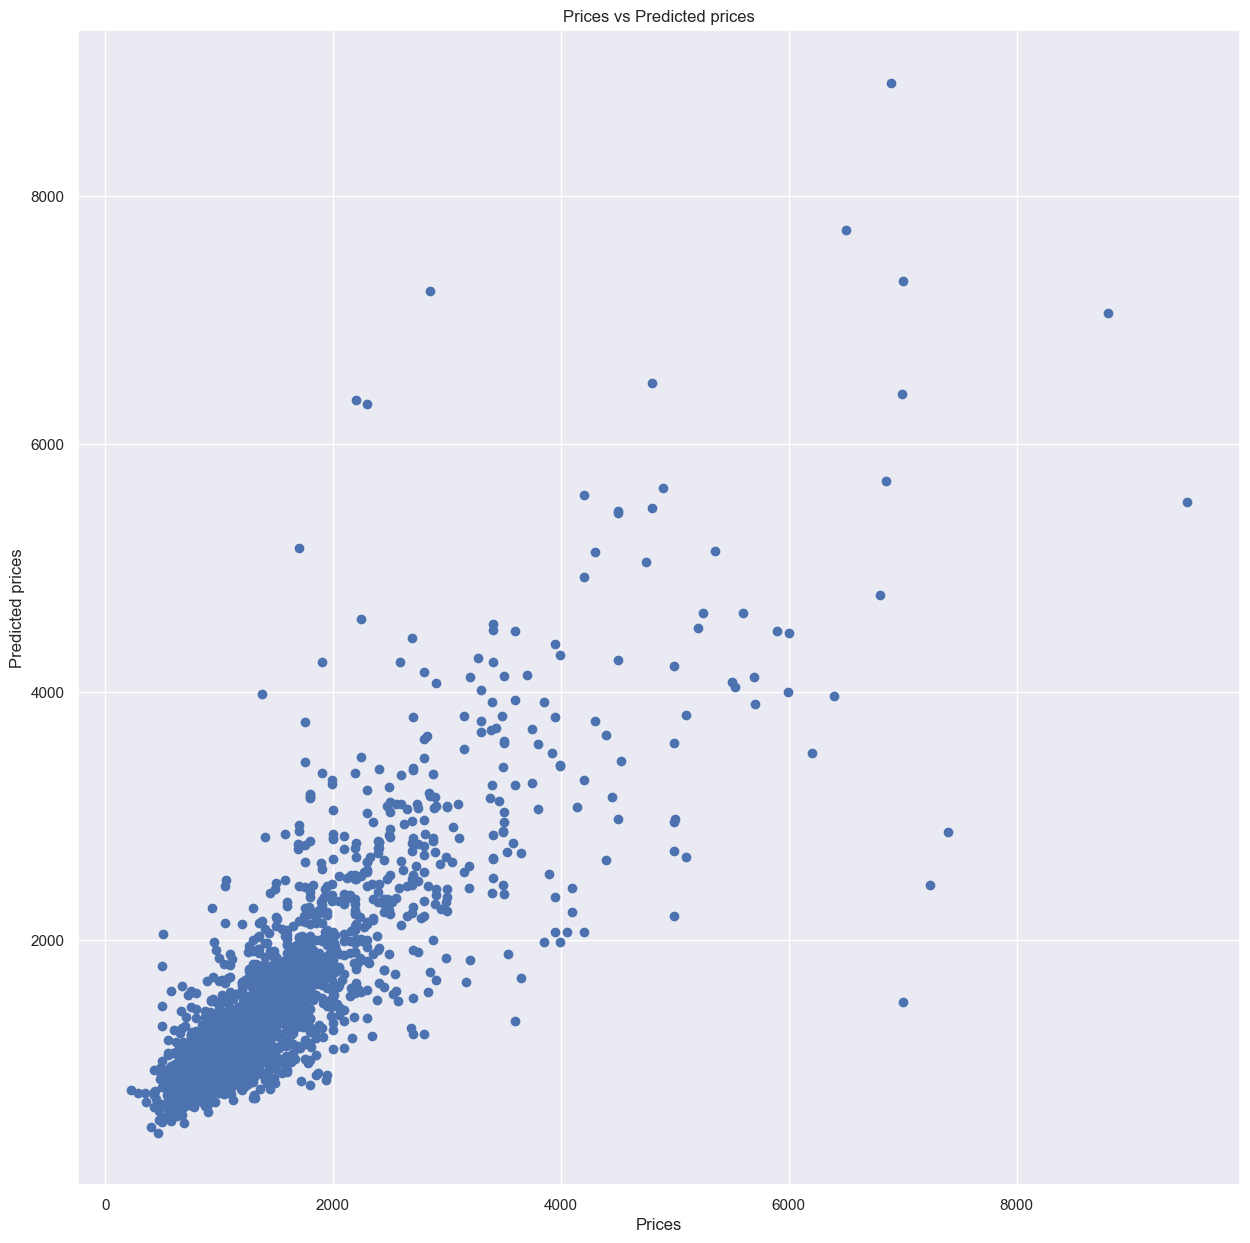

In [279]:
#do the same with random forest

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()
#show the feature importance



Mean Squared Error: 583178.4579945314
R2 score: 0.2791260749208153


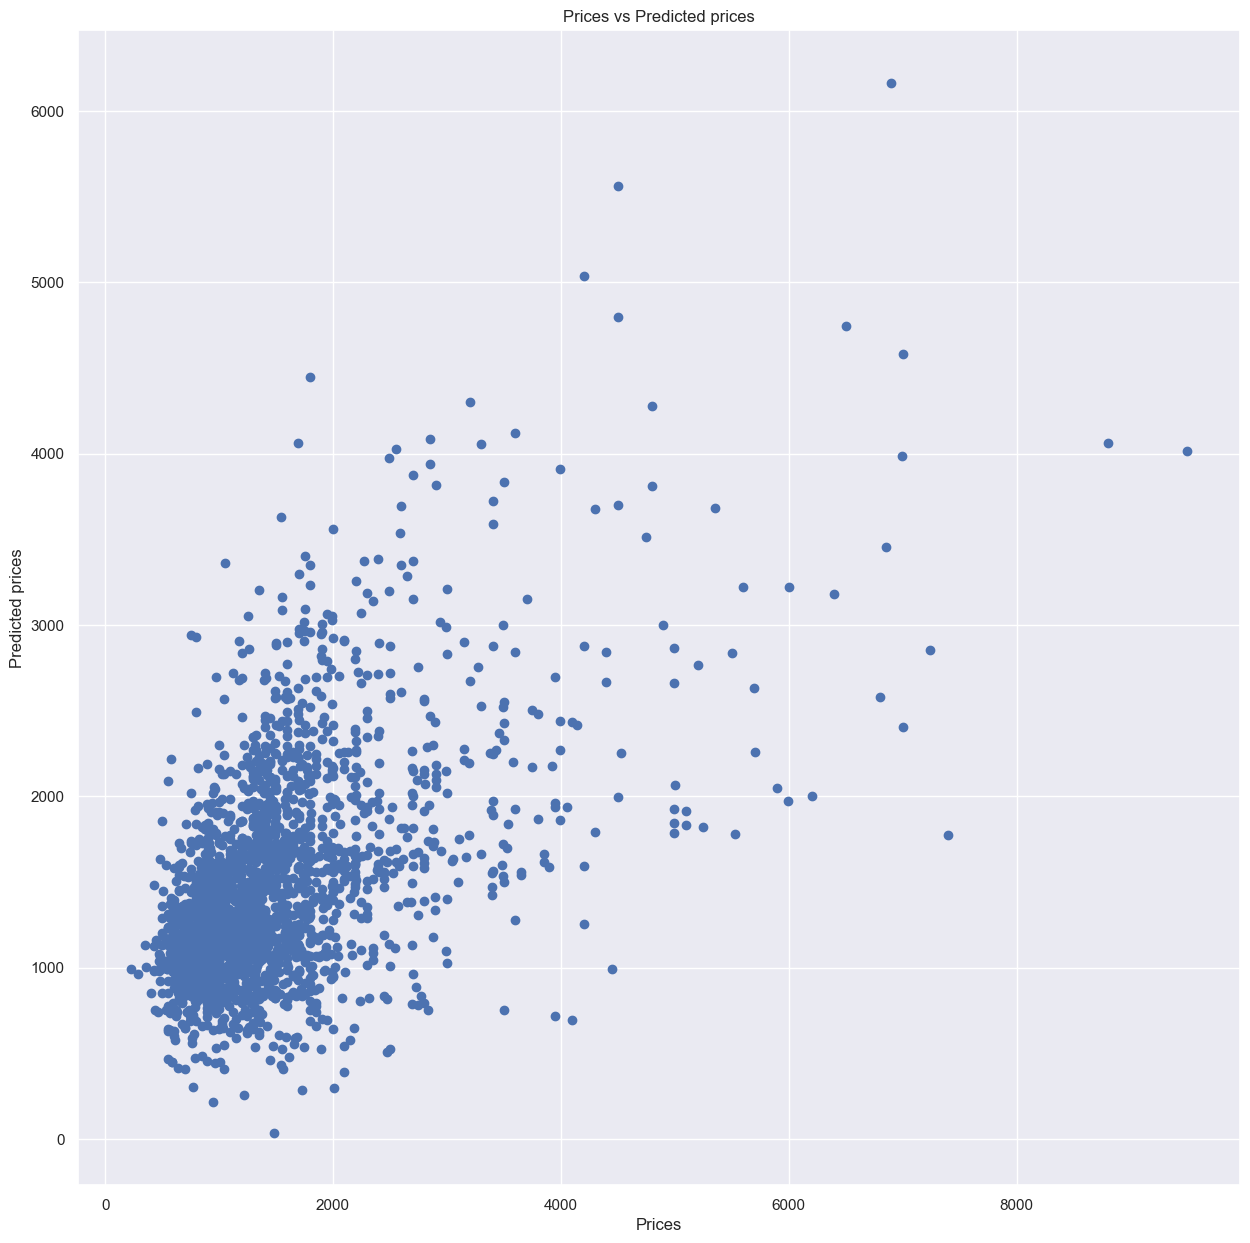

Mean Squared Error: 581161.4469269986
R2 score: 0.28161932662661504


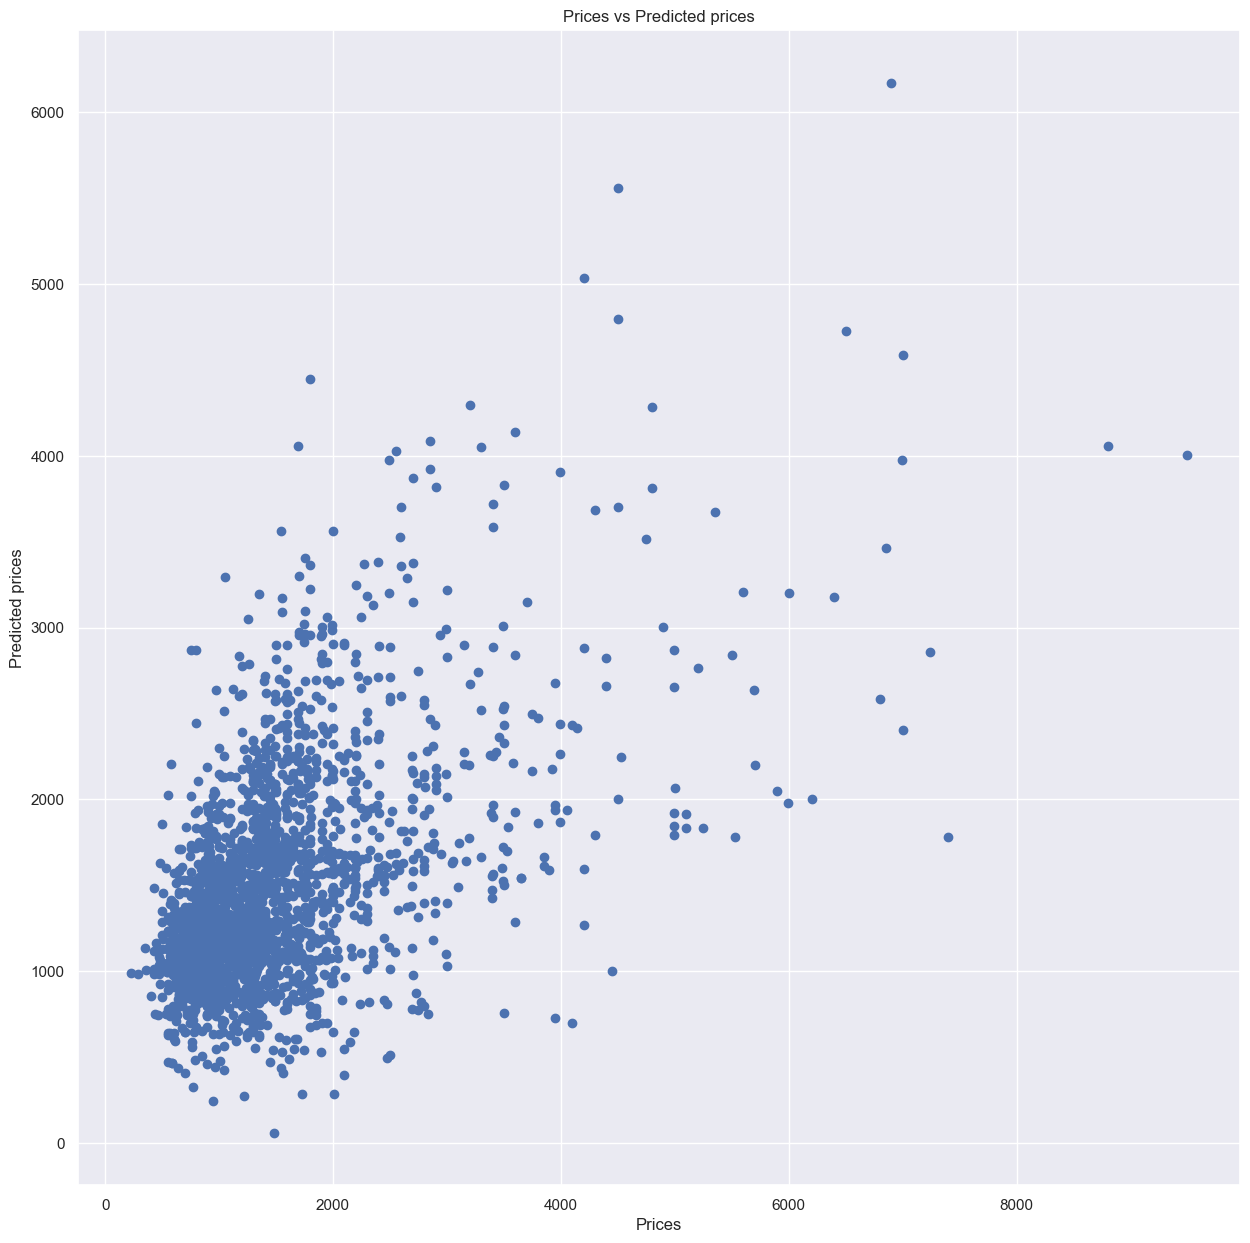

Mean Squared Error: 635379.2943727592
R2 score: 0.21459999152981624


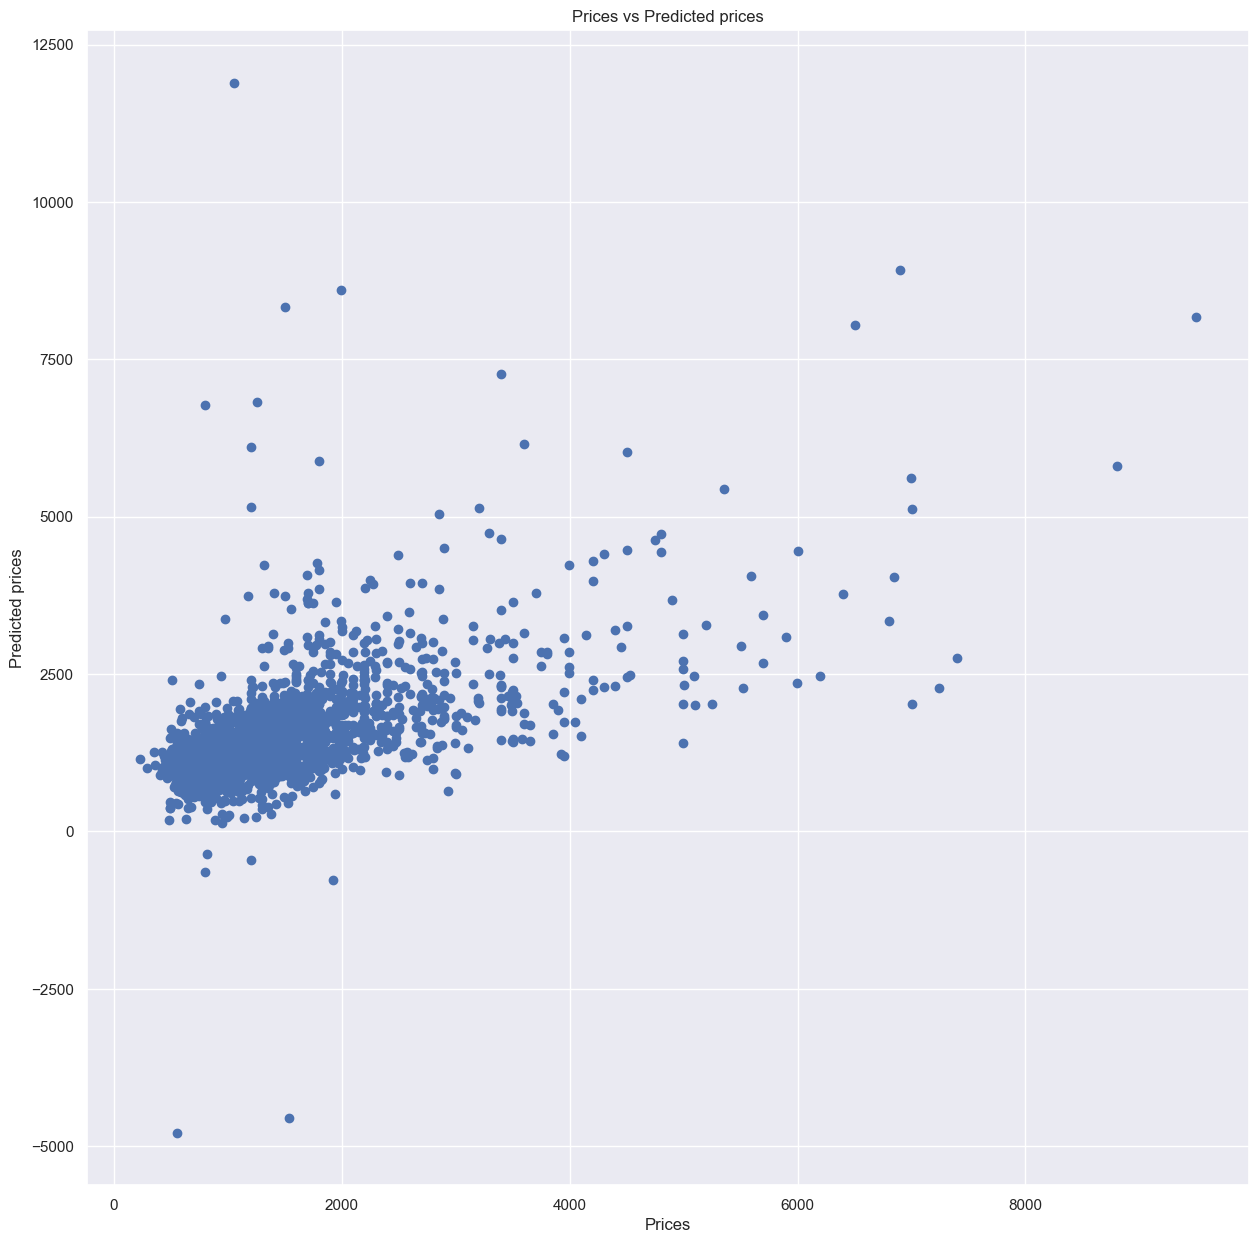

In [ ]:
#do the same with ridge lasso and polynomial regression
X = data[['latitude', 'longitude', 'square_feet', 'bedrooms', 'bathrooms', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = Ridge()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

regressor = Lasso()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


In [ ]:
data
